Import necessary package

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

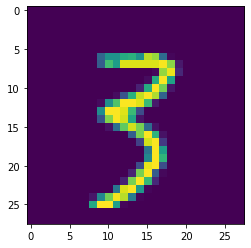

In [5]:
plt.imshow(X_train[878])

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
Y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [7]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

Compiling the model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [9]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 198s 105ms/step - loss: 0.3266 - accuracy: 0.9508 - val_loss: 0.0859 - val_accuracy: 0.9731
Epoch 2/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0703 - accuracy: 0.9789 - val_loss: 0.0779 - val_accuracy: 0.9787
Epoch 3/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0506 - accuracy: 0.9839 - val_loss: 0.0906 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0920 - val_accuracy: 0.9763
Epoch 5/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.1003 - val_accuracy: 0.9766


Test the model

In [10]:
 metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10030379891395569, 0.9765999913215637]


In [11]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 86ms/step
[[1.0222468e-08 2.6511718e-16 3.9640309e-09 4.3308290e-08 6.4756505e-16
  7.0715225e-11 6.0800013e-21 1.0000000e+00 1.9593904e-09 3.0578086e-08]
 [2.3021235e-10 7.1066273e-09 9.9999952e-01 3.4623493e-10 2.6701836e-14
  5.8437188e-18 5.1352339e-07 2.1175460e-17 5.0857721e-12 7.6638044e-18]
 [2.7067957e-09 9.9999869e-01 1.5051471e-07 6.8137995e-11 3.8374222e-07
  1.8590588e-07 1.8088924e-08 2.1989459e-07 2.0958488e-07 2.4427125e-11]
 [9.9999905e-01 1.5069367e-15 1.4405806e-08 9.9383169e-14 9.1331378e-15
  1.7426993e-13 9.0488260e-07 4.9867401e-14 9.1710181e-11 4.1735854e-10]]


In [12]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
